

# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>In this project, we will be analyzing data associated with **TMDb Movie** data set that contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
>
>In particular, we will be interested to answer the following question :
>1. Which genres are most popular? have high bugests? have high revenues?
>2. Which genres are most popular from year to year? have high bugests from year to year? have high revenues from year to year?
>3. What kinds of properties are associated with movies that have high revenues?
>
 To start, we wil import the packages we need for this analysis :

In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

In [2]:
# Load data and print out a few lines
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#check the shape of data set
df.shape

(10866, 21)

In [4]:
#check duplicated rows
df.duplicated().sum()

1

In [5]:
#check the numeric variables
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
#check the Dtypes & Non-null values of each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### Frist impression
>- There is one duplicated row, it will be droped.
>
>- There are columns in the dataset, which are not important to the intended analysis and therefore will be removed. This includes:
>>- imdb_id
>>- cast
>>- homepage
>>- director
>>- overview
>>- release_date
>>- tagline
>>- keywords
>>- production_companies
>
>- Columns, like *genres*, contains some nan values (23 nan value) : rows with nan values represent only 0.2% , so it will be removed.
>
>- `df.describe()` indicates that many columns, especially budget and revenue, contain many "0" in their columns. In order to provide a proper analysis, the columns *budget_adj*, *revenue_adj*, *budget*, *revenue* and *runtime* will change its "0" values into its mean value.
>-  *genres* column seems to contain several values, which are seperated by an "|". They need to be cleaned in order to provide a proper dataset for the intended analysis.

### Data Cleaning (Replace this with more specific notes!)

In [7]:
#remove duplicated row
df.drop_duplicates(inplace=True)

In [8]:
#remove not important columns
df.drop(['imdb_id','cast','homepage','director','tagline','keywords', 'overview','production_companies','release_date' ],axis=1,inplace=True)

In [9]:
#remove nan values
df.dropna(inplace=True)

In [10]:
#check if all values are non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10842 non-null  int64  
 1   popularity      10842 non-null  float64
 2   budget          10842 non-null  int64  
 3   revenue         10842 non-null  int64  
 4   original_title  10842 non-null  object 
 5   runtime         10842 non-null  int64  
 6   genres          10842 non-null  object 
 7   vote_count      10842 non-null  int64  
 8   vote_average    10842 non-null  float64
 9   release_year    10842 non-null  int64  
 10  budget_adj      10842 non-null  float64
 11  revenue_adj     10842 non-null  float64
dtypes: float64(4), int64(6), object(2)
memory usage: 1.1+ MB


In [11]:
#columns with "0" values will be replaced with mean value
for col in ['budget','revenue','runtime','budget_adj','revenue_adj']:
    df[col] = df[col].replace(0,df[col].mean())
    


In [12]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10842.000000,10842.000000,1.084200e+04,1.084200e+04,10842.000000,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04
mean,65870.675521,0.647461,2.232495e+07,6.197271e+07,102.421062,217.823649,5.974064,2001.314794,2.679108e+07,7.993283e+07
std,91981.355752,1.001032,2.803615e+07,1.111273e+08,30.828622,576.180993,0.934257,12.813617,3.053264e+07,1.366907e+08
min,5.000000,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10589.250000,0.208210,1.465531e+07,3.991138e+07,90.000000,17.000000,5.400000,1995.000000,1.758712e+07,5.147797e+07
50%,20557.000000,0.384532,1.465531e+07,3.991138e+07,99.000000,38.000000,6.000000,2006.000000,1.758712e+07,5.147797e+07
75%,75186.000000,0.715393,1.500000e+07,3.991138e+07,111.000000,146.000000,6.600000,2011.000000,2.092507e+07,5.147797e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [13]:
df.head()

,id,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,119.0,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136.0,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,137.0,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [14]:
#split str variables into list varibles from 'genres' column
df.genres = df.genres.str.split('|')

In [15]:
#collect all uniques genres from df.gneres column in one list called genres
genres = []
for values in df.genres :
    for i in values :
        if i not in genres:
            genres.append(i)
genres

['Action',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Fantasy',
 'Crime',
 'Western',
 'Drama',
 'Family',
 'Animation',
 'Comedy',
 'Mystery',
 'Romance',
 'War',
 'History',
 'Music',
 'Horror',
 'Documentary',
 'TV Movie',
 'Foreign']

In [16]:
#create a new dataframe df_genres that has the same index as df and a column for each genre
df_genres =pd.DataFrame(index=df.index, columns=genres)
df_genres.head()

,Action,Adventure,Science Fiction,Thriller,Fantasy,Crime,Western,Drama,Family,Animation,Comedy,Mystery,Romance,War,History,Music,Horror,Documentary,TV Movie,Foreign
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#concat df_genres to df
df = pd.concat([df,df_genres], axis = 1)
df.head()

,id,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,...,Comedy,Mystery,Romance,War,History,Music,Horror,Documentary,TV Movie,Foreign
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,"[Action, Adventure, Science Fiction, Thriller]",5562,6.5,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,"[Action, Adventure, Science Fiction, Thriller]",6185,7.1,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,119.0,"[Adventure, Science Fiction, Thriller]",2480,6.3,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136.0,"[Action, Adventure, Science Fiction, Fantasy]",5292,7.5,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,137.0,"[Action, Crime, Thriller]",2947,7.3,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#for each row in df, fill each genre column with "1" if movie genre is the same as the name of column
#else, fill with "0"
for genre in genres :
    for i in df.index :
        if genre in df.genres[i]:
            df.loc[i,genre] = 1
        else :
            df.loc[i,genre] = 0

In [19]:
#we don't need anymore df.genres, we will drop it
df.drop(['genres'],axis=1,inplace=True)

In [20]:
#check the clean df
df.head()

,id,popularity,budget,revenue,original_title,runtime,vote_count,vote_average,release_year,budget_adj,...,Comedy,Mystery,Romance,War,History,Music,Horror,Documentary,TV Movie,Foreign
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,5562,6.5,2015,1.379999e+08,...,0,0,0,0,0,0,0,0,0,0
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,6185,7.1,2015,1.379999e+08,...,0,0,0,0,0,0,0,0,0,0
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,119.0,2480,6.3,2015,1.012000e+08,...,0,0,0,0,0,0,0,0,0,0
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136.0,5292,7.5,2015,1.839999e+08,...,0,0,0,0,0,0,0,0,0,0
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,137.0,2947,7.3,2015,1.747999e+08,...,0,0,0,0,0,0,0,0,0,0


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 : Which genres are most popular ? have high bugests? have high revenues?

#### a. Which genres are most popular ?

In [21]:
#create new dataframe with genres as index & mean value popularity for each genre as column
df_popularity = pd.DataFrame(index=genres)
df_popularity['popularity'] = [df[df[col] == 1].popularity.mean() for col in genres]
# sort df_popularity by mean popularity values
df_popularity.sort_values('popularity', ascending=False, inplace=True)
df_popularity

,popularity
Adventure,1.154259
Science Fiction,1.001548
Fantasy,0.992840
Action,0.926274
Animation,0.852182
Family,0.786668
Crime,0.744930
Thriller,0.741563
War,0.727683
Mystery,0.690012


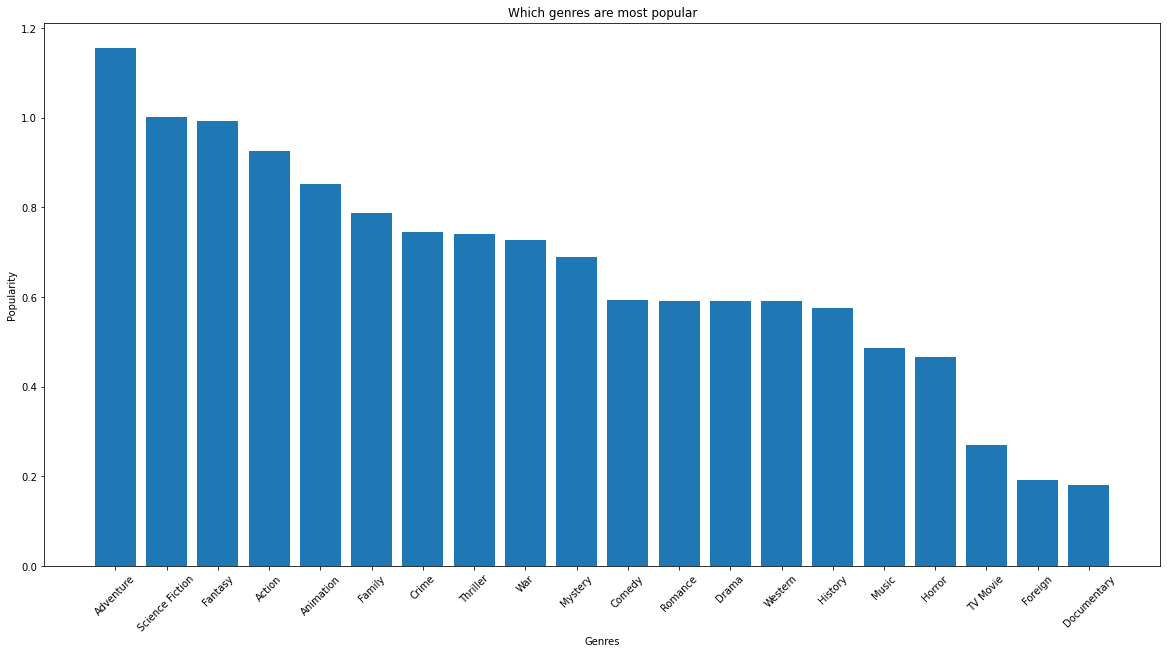

In [22]:
#plot findings
plt.subplots(figsize=(20, 10))
plt.xticks(rotation=45)
plt.bar(df_popularity.index, df_popularity.popularity.values)
plt.title("Which genres are most popular")
plt.xlabel("Genres")
plt.ylabel("Popularity");

#### b. Which genres have high bugests ?

In [23]:
#create new dataframe with genres as index & mean value budget for each genre as column
df_budget = pd.DataFrame(index=genres)
df_budget['budget'] = [df[df[col] == 1].budget.mean() for col in genres]
#sort df_budget by mean budget values
df_budget.sort_values('budget', ascending=False, inplace=True)
df_budget

,budget
Adventure,4.317269e+07
Fantasy,3.914028e+07
Action,3.360470e+07
Animation,3.236390e+07
Family,3.178822e+07
Science Fiction,3.126886e+07
War,2.713396e+07
Western,2.705673e+07
History,2.522052e+07
Thriller,2.359009e+07


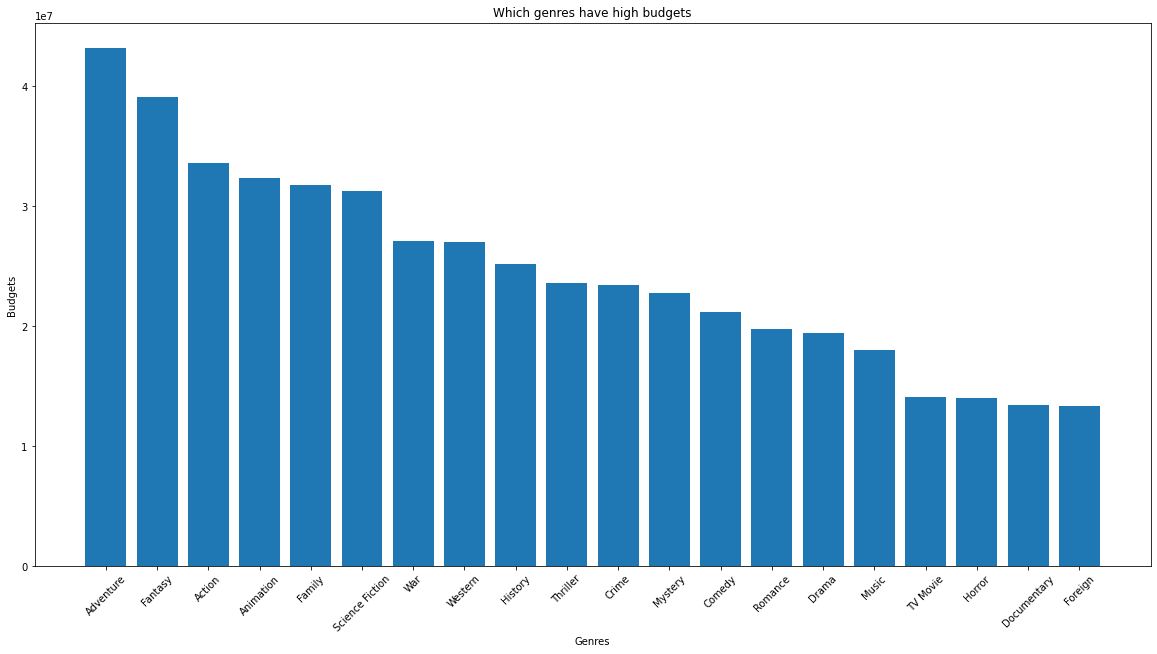

In [24]:
#plot findings
plt.subplots(figsize=(20, 10))
plt.xticks(rotation=45)
plt.bar(df_budget.index, df_budget.budget.values)
plt.title("Which genres have high budgets")
plt.xlabel("Genres")
plt.ylabel("Budgets");

#### c. Which genres have high revenues ?

In [25]:
#create new dataframe with genres as index & mean value revenue for each genre as column
df_revenue = pd.DataFrame(index=genres)
df_revenue['revenue'] = [df[df[col] == 1].revenue.mean() for col in genres]
#sort df_revenue by mean revenue values
df_revenue.sort_values('revenue', ascending=False, inplace=True)
df_revenue

,revenue
Adventure,1.301768e+08
Fantasy,1.161386e+08
Animation,1.016353e+08
Family,9.571212e+07
Action,9.161201e+07
Science Fiction,9.102178e+07
War,6.726524e+07
Thriller,6.210286e+07
Mystery,5.992689e+07
Crime,5.949460e+07


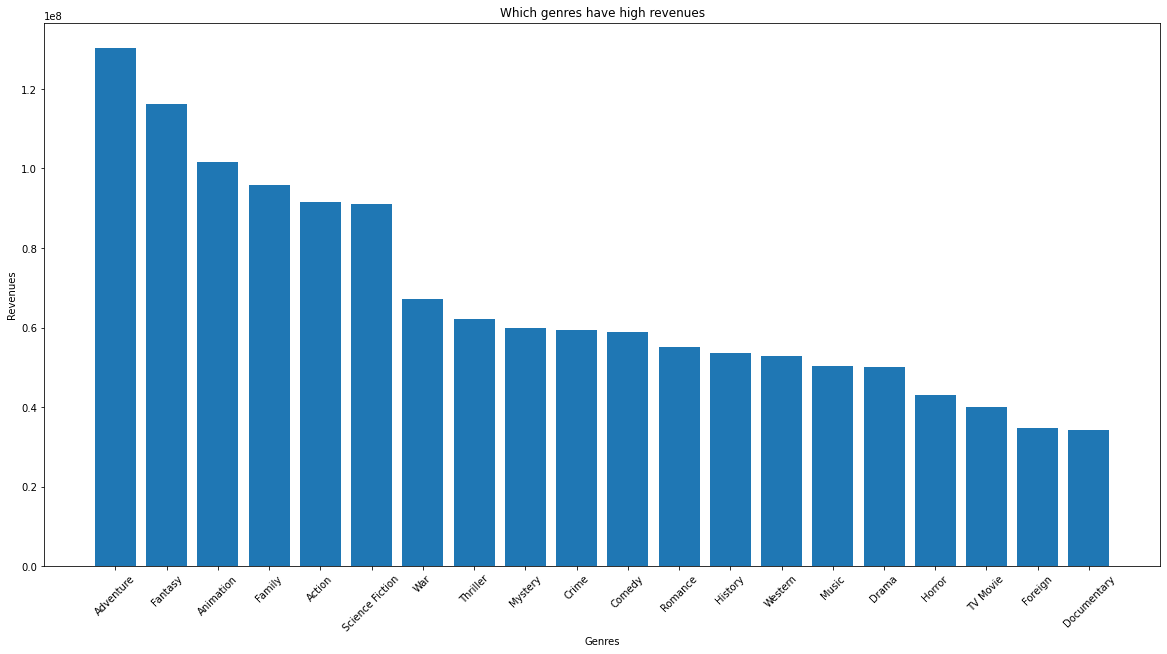

In [26]:
#plot findings
plt.subplots(figsize=(20, 10))
plt.xticks(rotation=45)
plt.bar(df_revenue.index, df_revenue.revenue.values)
plt.title("Which genres have high revenues")
plt.xlabel("Genres")
plt.ylabel("Revenues");

### Research Question 2 : Which genres are most popular from year to year? have high bugests from year to year? have high revenues from year to year?

#### a. Which genres are most popular from year to year ?

In [27]:
#create new array called years contains all unique years from df.release_year & sort the values
years = np.sort(df.release_year.unique())
years

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015])

In [28]:
#create new dataframe with years as index
df_popularity = pd.DataFrame(index=years)
#add new column for each genre
#each column will have the mean popuarity for each year
for genre in genres:
    df_popularity[genre] = df[df[genre] == 1].groupby('release_year').mean().popularity

In [29]:
df_popularity.head()

,Action,Adventure,Science Fiction,Thriller,Fantasy,Crime,Western,Drama,Family,Animation,Comedy,Mystery,Romance,War,History,Music,Horror,Documentary,TV Movie,Foreign
1960,0.590724,0.700981,0.327905,0.811910,0.428247,0.346479,0.567759,0.566305,0.278064,NaN,0.396000,NaN,0.541227,0.225863,0.412364,0.423531,0.591450,NaN,NaN,0.194948
1961,0.365913,0.767323,0.274103,NaN,0.154073,0.806519,0.210021,0.432233,0.755722,2.631987,0.679838,0.712793,0.426036,0.531184,0.334463,0.564748,0.254578,NaN,NaN,0.113651
1962,0.708945,0.942513,0.179212,0.760582,0.235542,0.472816,0.414180,0.392000,0.323463,NaN,0.273183,0.259220,0.365621,0.506162,0.600060,0.323933,0.179368,NaN,NaN,0.235542
1963,0.951729,0.728487,0.467835,0.719929,0.214071,0.552367,0.246957,0.322448,0.852632,2.180410,0.444481,0.421033,0.399573,0.664326,0.481618,NaN,0.376901,NaN,NaN,0.351647
1964,0.813087,0.736431,0.226636,0.622580,0.599791,0.261690,0.127679,0.364818,0.878298,0.445746,0.491229,0.308091,0.221586,0.930959,0.316377,0.753799,0.189650,NaN,NaN,0.152209


In [30]:
#print genre with highest mean popularity value for each year
df_popularity.idxmax(axis=1)

1960           Thriller
1961          Animation
1962          Adventure
1963          Animation
1964                War
1965              Music
1966          Animation
1967          Animation
1968            Mystery
1969              Crime
1970          Animation
1971            Fantasy
1972              Crime
1973          Animation
1974            Mystery
1975          Adventure
1976              Crime
1977             Action
1978              Music
1979             Action
1980    Science Fiction
1981          Adventure
1982                War
1983          Adventure
1984             Family
1985             Family
1986          Adventure
1987            History
1988             Action
1989          Animation
1990          Adventure
1991          Animation
1992          Animation
1993            Fantasy
1994              Crime
1995          Animation
1996              Crime
1997    Science Fiction
1998                War
1999          Adventure
2000          Adventure
2001            

In [32]:
#print how often each genre has yearly highest mean popularity value
df_popularity_count = df_popularity.idxmax(axis=1).value_counts()
df_popularity_count

Adventure          14
Animation          10
Fantasy             9
Crime               5
Action              3
War                 3
Mystery             2
Science Fiction     2
Family              2
Music               2
Western             2
Thriller            1
History             1
dtype: int64

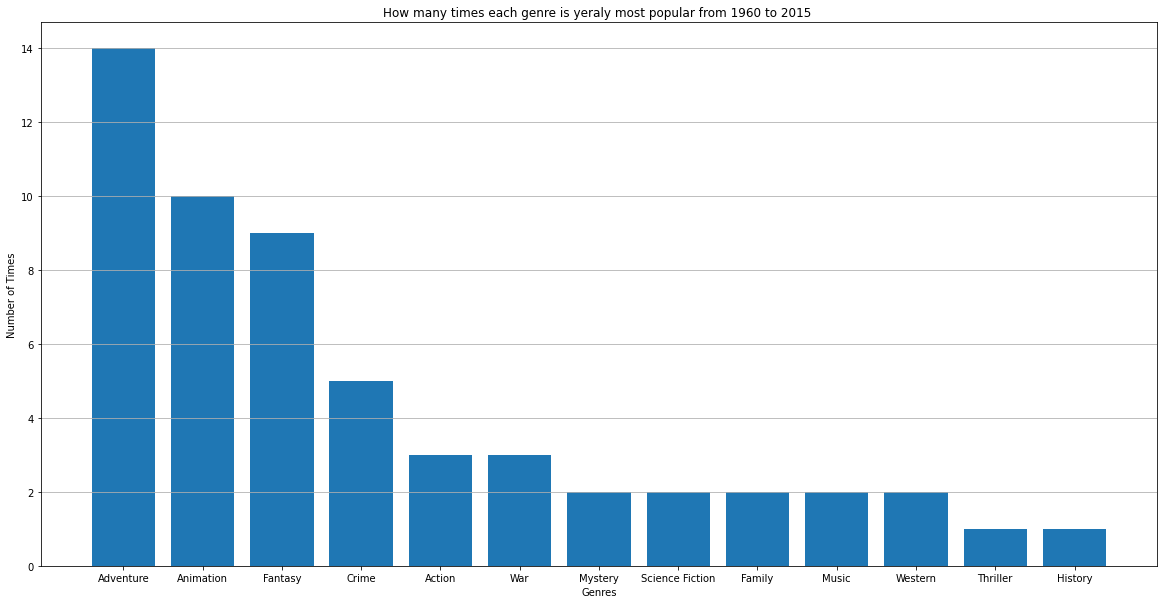

In [34]:
#plot findings
plt.subplots(figsize=(20, 10))
plt.grid(axis='y')
plt.bar(df_popularity_count.index, df_popularity_count.values)
plt.title("How many times each genre is yeraly most popular from 1960 to 2015 ")
plt.xlabel("Genres")
plt.ylabel("Number of Times");

#### b. Which genres have high budgets from year to year ?

In [35]:
#create new dataframe with years as index
df_budget = pd.DataFrame(index=years)
#add new column for each genre
#each column will have the mean budget for each year
for genre in genres:
    df_budget[genre] = df[df[genre] == 1].groupby('release_year').mean().budget

In [36]:
#print genre with highest mean budget value for each year
df_budget.idxmax(axis=1)

1960              Crime
1961    Science Fiction
1962             Family
1963              Drama
1964            Western
1965    Science Fiction
1966            Fantasy
1967                War
1968          Animation
1969    Science Fiction
1970            Foreign
1971          Animation
1972            Western
1973          Animation
1974            Fantasy
1975            History
1976             Family
1977            Western
1978            Fantasy
1979                War
1980              Music
1981                War
1982              Music
1983            History
1984          Adventure
1985                War
1986            Western
1987            History
1988                War
1989          Adventure
1990          Adventure
1991            History
1992            History
1993          Adventure
1994                War
1995             Action
1996          Adventure
1997                War
1998            Western
1999          Adventure
2000            Western
2001            

In [37]:
#print how often each genre has yearly highest mean budget value 
df_budget_count = df_budget.idxmax(axis=1).value_counts()
df_budget_count

Adventure          12
Western            10
War                 9
Fantasy             5
History             5
Science Fiction     3
Animation           3
Family              2
Action              2
Music               2
Foreign             1
Crime               1
Drama               1
dtype: int64

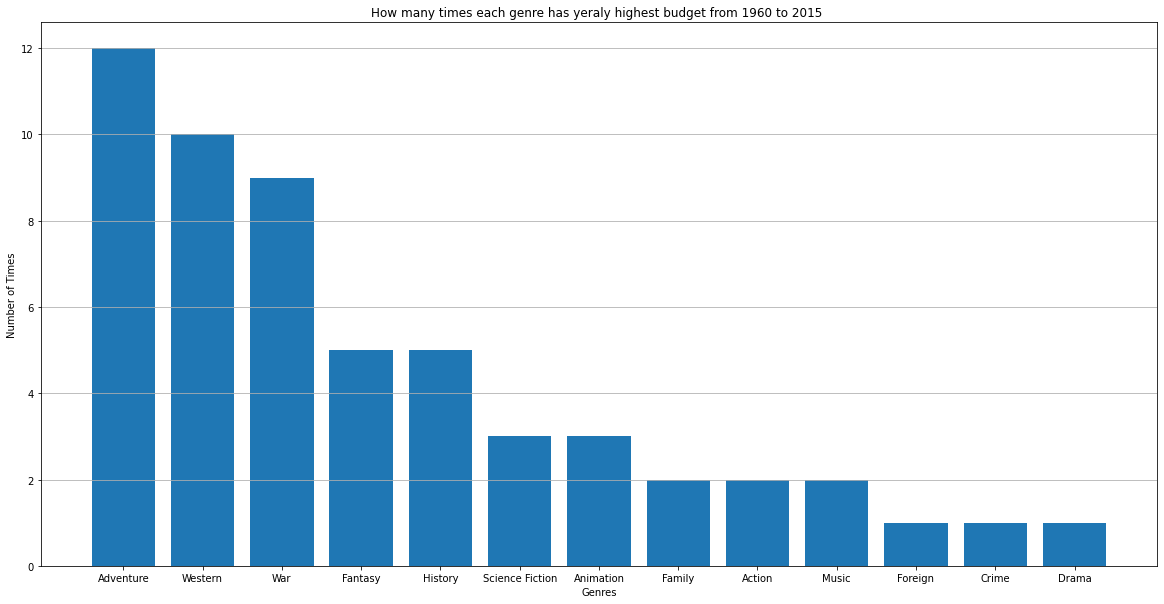

In [38]:
#plot findings
plt.subplots(figsize=(20, 10))
plt.grid(axis='y')
plt.bar(df_budget_count.index, df_budget_count.values)
plt.title("How many times each genre has yeraly highest budget from 1960 to 2015 ")
plt.xlabel("Genres")
plt.ylabel("Number of Times");

#### c. Which genres have high revenues from year to year ?

In [39]:
#create new dataframe with years as index
df_revenue = pd.DataFrame(index=years)
#add new column for each genre
#each column will have the mean revenue for each year
for genre in genres:
    df_revenue[genre] = df[df[genre] == 1].groupby('release_year').mean().revenue

In [40]:
#print genre with highest mean revenue value for each year
df_revenue.idxmax(axis=1)

1960            History
1961          Animation
1962                War
1963             Action
1964             Family
1965              Music
1966            Fantasy
1967          Animation
1968            Mystery
1969              Crime
1970            History
1971          Adventure
1972              Crime
1973           Thriller
1974            Western
1975             Horror
1976              Music
1977    Science Fiction
1978            Fantasy
1979          Adventure
1980    Science Fiction
1981          Adventure
1982          Adventure
1983          Adventure
1984             Family
1985                War
1986                War
1987              Music
1988          Animation
1989             Family
1990            Western
1991            History
1992            Western
1993            Mystery
1994          Animation
1995            Mystery
1996                War
1997                War
1998            Western
1999          Adventure
2000          Adventure
2001            

In [41]:
#print how often each genre has yearly highest mean revenue value 
df_revenue_count = df_revenue.idxmax(axis=1).value_counts()
df_revenue_count

Adventure          16
Fantasy             8
War                 5
Animation           4
Western             4
Mystery             3
Family              3
Music               3
History             3
Science Fiction     2
Crime               2
Horror              1
Action              1
Thriller            1
dtype: int64

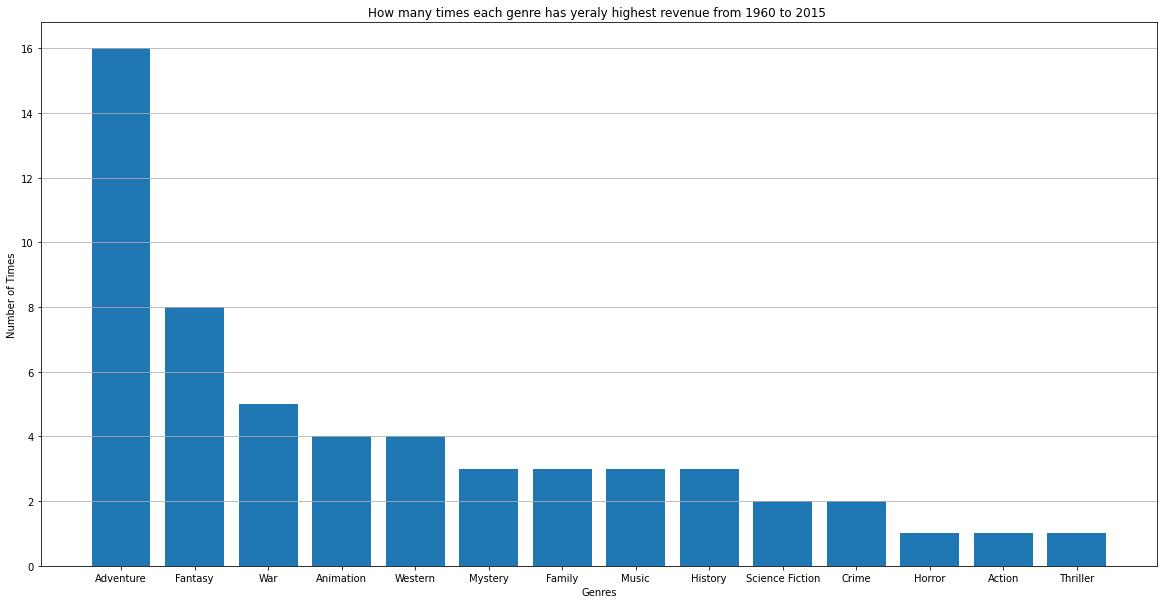

In [42]:
#plot findings
plt.subplots(figsize=(20, 10))
plt.grid(axis='y')
plt.bar(df_revenue_count.index, df_revenue_count.values)
plt.title("How many times each genre has yeraly highest revenue from 1960 to 2015 ")
plt.xlabel("Genres")
plt.ylabel("Number of Times");

### Research Question 3  : What kinds of properties are associated with movies that have high revenues?

> In first place we will check the properties and the distribution of revenue column

<AxesSubplot:>

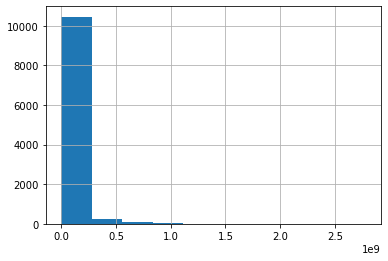

In [43]:
#plot revenue histogram
df.revenue.hist()

In [44]:
#check revenue spread
df.revenue.describe()

count    1.084200e+04
mean     6.197271e+07
std      1.111273e+08
min      2.000000e+00
25%      3.991138e+07
50%      3.991138e+07
75%      3.991138e+07
max      2.781506e+09
Name: revenue, dtype: float64

In [45]:
df.revenue.value_counts()

3.991138e+07    5993
1.200000e+07      10
1.000000e+07       8
1.100000e+07       7
6.000000e+06       6
                ... 
1.163000e+08       1
4.026302e+07       1
2.835116e+06       1
1.060050e+07       1
3.870231e+07       1
Name: revenue, Length: 4702, dtype: int64

In [46]:
df.shape

(10842, 31)

> We can see that more than half of revenue values are filled with the mean value, so we can not use the third quartile value to find movies with high revenues
>
> In this case, we will take the Top 100 highest revenue movie for our next analysis :

In [47]:
#create new dataframe contains the Top 100 highest revenue movie
df_high_revenue = df.nlargest(100,'revenue')
df_high_revenue.head()

,id,popularity,budget,revenue,original_title,runtime,vote_count,vote_average,release_year,budget_adj,...,Comedy,Mystery,Romance,War,History,Music,Horror,Documentary,TV Movie,Foreign
1386,19995,9.432768,237000000.0,2.781506e+09,Avatar,162.0,8458,7.1,2009,2.408869e+08,...,0,0,0,0,0,0,0,0,0,0
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136.0,5292,7.5,2015,1.839999e+08,...,0,0,0,0,0,0,0,0,0,0
5231,597,4.355219,200000000.0,1.845034e+09,Titanic,194.0,4654,7.3,1997,2.716921e+08,...,0,0,1,0,0,0,0,0,0,0
4361,24428,7.637767,220000000.0,1.519558e+09,The Avengers,143.0,8903,7.3,2012,2.089437e+08,...,0,0,0,0,0,0,0,0,0,0
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,5562,6.5,2015,1.379999e+08,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

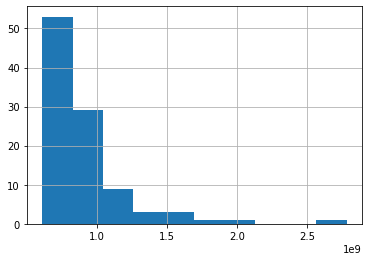

In [48]:
#plot histogram for movies with high revenues
df_high_revenue.revenue.hist()

In [49]:
df_high_revenue.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,100.000000,100.000000,1.000000e+02,1.000000e+02,100.000000,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02
mean,43314.780000,5.191795,1.542350e+08,8.979584e+08,130.070000,3475.060000,6.909000,2007.970000,1.570108e+08,9.654023e+08
std,55833.708222,4.467371,6.694002e+07,3.189943e+08,25.168625,1839.603382,0.651199,6.817172,6.237636e+07,4.034864e+08
min,11.000000,0.436803,1.050000e+07,6.118994e+08,88.000000,201.000000,5.600000,1977.000000,2.372625e+07,5.726906e+08
25%,673.750000,2.755044,1.122500e+08,7.097980e+08,110.250000,2245.750000,6.400000,2004.750000,1.149844e+08,7.086393e+08
50%,12299.500000,4.264860,1.500000e+08,8.079637e+08,132.000000,3169.500000,6.950000,2010.000000,1.565855e+08,8.776267e+08
75%,69080.750000,6.067551,2.000000e+08,9.590500e+08,144.250000,4266.000000,7.400000,2013.000000,1.924616e+08,1.062875e+09
max,211672.000000,32.985763,3.800000e+08,2.781506e+09,201.000000,9767.000000,8.100000,2015.000000,3.683713e+08,2.827124e+09


In [50]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10842.000000,10842.000000,1.084200e+04,1.084200e+04,10842.000000,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04
mean,65870.675521,0.647461,2.232495e+07,6.197271e+07,102.421062,217.823649,5.974064,2001.314794,2.679108e+07,7.993283e+07
std,91981.355752,1.001032,2.803615e+07,1.111273e+08,30.828622,576.180993,0.934257,12.813617,3.053264e+07,1.366907e+08
min,5.000000,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10589.250000,0.208210,1.465531e+07,3.991138e+07,90.000000,17.000000,5.400000,1995.000000,1.758712e+07,5.147797e+07
50%,20557.000000,0.384532,1.465531e+07,3.991138e+07,99.000000,38.000000,6.000000,2006.000000,1.758712e+07,5.147797e+07
75%,75186.000000,0.715393,1.500000e+07,3.991138e+07,111.000000,146.000000,6.600000,2011.000000,2.092507e+07,5.147797e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [51]:
df_high_revenue.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,0.415393,0.184996,0.096527,-0.126259,0.125860,0.149980,0.627533,0.021989,-0.172016
popularity,0.415393,1.000000,0.093701,0.295772,0.222352,0.513401,0.413735,0.144966,0.051038,0.228978
budget,0.184996,0.093701,1.000000,0.281616,0.283229,0.258340,-0.039314,0.550927,0.970777,-0.073270
revenue,0.096527,0.295772,0.281616,1.000000,0.292554,0.419598,0.153166,0.085193,0.302075,0.769489
runtime,-0.126259,0.222352,0.283229,0.292554,1.000000,0.455008,0.224664,-0.082996,0.358443,0.270631
vote_count,0.125860,0.513401,0.258340,0.419598,0.455008,1.000000,0.549902,0.140847,0.242870,0.293063
vote_average,0.149980,0.413735,-0.039314,0.153166,0.224664,0.549902,1.000000,-0.113706,-0.036819,0.226097
release_year,0.627533,0.144966,0.550927,0.085193,-0.082996,0.140847,-0.113706,1.000000,0.382667,-0.502587
budget_adj,0.021989,0.051038,0.970777,0.302075,0.358443,0.242870,-0.036819,0.382667,1.000000,0.022140
revenue_adj,-0.172016,0.228978,-0.073270,0.769489,0.270631,0.293063,0.226097,-0.502587,0.022140,1.000000


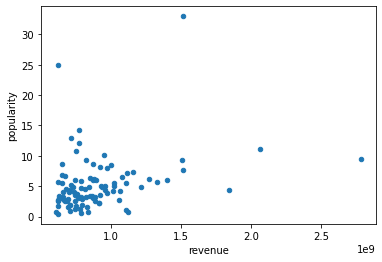

In [52]:
#Scatter plot to check correlation between revenue and popularity
df_high_revenue.plot(x="revenue", y="popularity", kind="scatter");

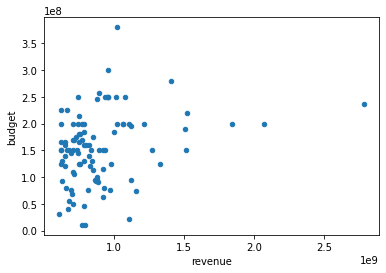

In [53]:
#Scatter plot to check correlation between revenue and budget
df_high_revenue.plot(x="revenue", y="budget", kind="scatter");

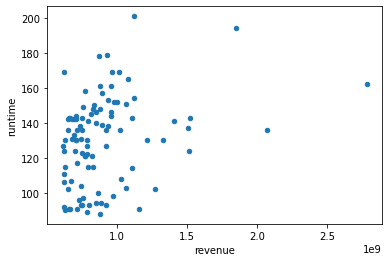

In [54]:
#Scatter plot to check correlation between revenue and runtime
df_high_revenue.plot(x="revenue", y="runtime", kind="scatter");

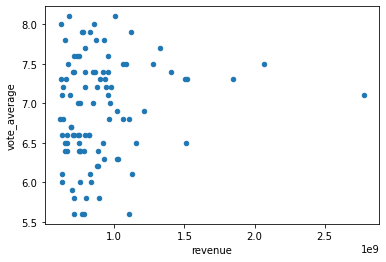

In [55]:
#Scatter plot to check correlation between revenue and vote_average
df_high_revenue.plot(x="revenue", y="vote_average", kind="scatter");

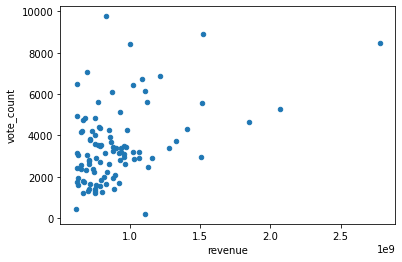

In [56]:
#Scatter plot to check correlation between revenue and vote_count
df_high_revenue.plot(x="revenue", y="vote_count", kind="scatter");

<a id='conclusions'></a>
## Conclusions

> *Question 1*: from 1960 to 2015, ***Adventure*** movies are the most popular, have the highest revenue and budget. In second place, we find ***Science Fiction*** as second most popular and ***Fantasy*** as second genre with highest revenue and budget.

> *Question 2*: From year to year, ***Adventure*** genre appears 14 times as the yearly most popular, 12 times with yearly highest budget, and 16 times with yearly highest revenue. ***Animation*** movies take the second place with 10 time as second most popular, ***Western*** 10 times as second genre with  yearly highest budget, and ***Fantasy*** 8 times as second genre with yearly highest revenue.

> *Question 3*: Correlation table and scatter plots show that `revenue` variable of Top 100 movies with highest revenue has moderate correlation with `popurality` and `budget` variables, and weak correlation with `vote_count`, `vote_average` and `runtime`. Comparing the mean value of all movies, Top 100 movies with highest revenue are more popular, have higher budget, longer and with higher vote average(6.9).